### Stock Market Prediction And Forecasting

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [77]:
start = '2012-01-01'
end = '2024-09-30'
stock = 'GOOG'
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3205 entries, 2012-01-03 to 2024-09-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3205 non-null   float64
 1   High       3205 non-null   float64
 2   Low        3205 non-null   float64
 3   Close      3205 non-null   float64
 4   Adj Close  3205 non-null   float64
 5   Volume     3205 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 175.3 KB


In [79]:
df.head(),df.tail()


(                 Open       High        Low      Close  Adj Close     Volume
 Date                                                                        
 2012-01-03  16.262545  16.641375  16.248346  16.573130  16.532528  147611217
 2012-01-04  16.563665  16.693678  16.453827  16.644611  16.603836  114989399
 2012-01-05  16.491436  16.537264  16.344486  16.413727  16.373516  131808205
 2012-01-06  16.417213  16.438385  16.184088  16.189817  16.150156  108119746
 2012-01-09  16.102144  16.114599  15.472754  15.503389  15.465409  233776981,
                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2024-09-23  165.339996  166.610001  162.949997  163.070007  163.070007   
 2024-09-24  164.250000  164.550003  162.029999  163.639999  163.639999   
 2024-09-25  162.970001  164.216995  162.774994  162.990005  162.990005   
 2024-09-26  165.029999  165.500000  163.500000  163.830002  163.830002   
 20

In [80]:
## Independent And dependent features
X=df.drop('Close',axis=1)
y= df['Close']

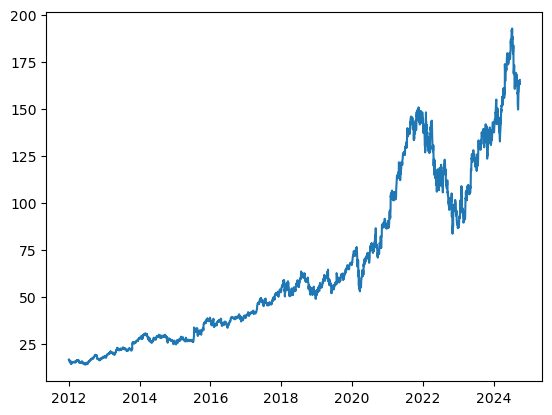

In [81]:
plt.plot(y)

In [82]:
y


Date
2012-01-03     16.573130
2012-01-04     16.644611
2012-01-05     16.413727
2012-01-06     16.189817
2012-01-09     15.503389
                 ...    
2024-09-23    163.070007
2024-09-24    163.639999
2024-09-25    162.990005
2024-09-26    163.830002
2024-09-27    165.289993
Name: Close, Length: 3205, dtype: float64

In [83]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape,X_test.shape

((2403, 5), (802, 5))

In [84]:
## Feature Selection based on correlaltion
X_train.corr()

,Open,High,Low,Adj Close,Volume
Open,1.000000,0.999879,0.999851,0.999699,-0.448972
High,0.999879,1.000000,0.999841,0.999847,-0.447945
Low,0.999851,0.999841,1.000000,0.999886,-0.451512
Adj Close,0.999699,0.999847,0.999886,1.000000,-0.450330
Volume,-0.448972,-0.447945,-0.451512,-0.450330,1.000000


<Axes: >

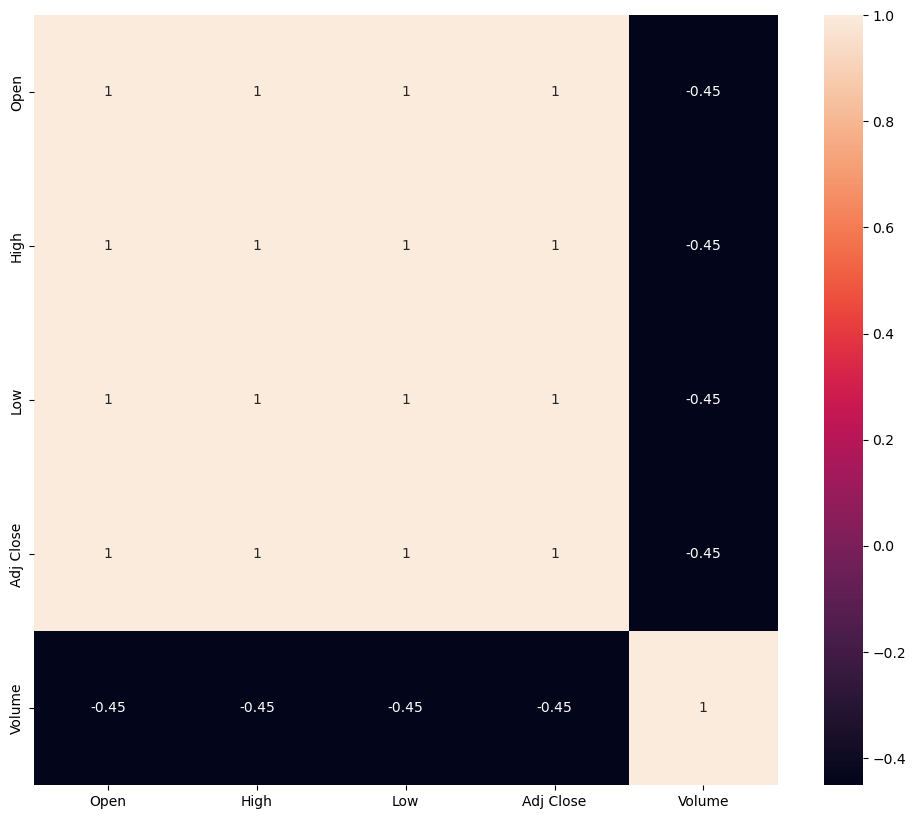

In [85]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

adj close,low,high,open acts as similar outputs

In [86]:
X_train.corr()

,Open,High,Low,Adj Close,Volume
Open,1.000000,0.999879,0.999851,0.999699,-0.448972
High,0.999879,1.000000,0.999841,0.999847,-0.447945
Low,0.999851,0.999841,1.000000,0.999886,-0.451512
Adj Close,0.999699,0.999847,0.999886,1.000000,-0.450330
Volume,-0.448972,-0.447945,-0.451512,-0.450330,1.000000


In [87]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [88]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.90)

In [89]:
corr_features

{'Adj Close', 'High', 'Low'}

In [90]:
## drop features when correlation is more than 0.90 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((2403, 2), (802, 2))

In [91]:
X_train.corr()

,Open,Volume
Open,1.000000,-0.448972
Volume,-0.448972,1.000000


## Feature Scaling Or Standardization

In [93]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [94]:
X_train_scaled

array([[-0.60194784, -0.06680625],
       [-0.48755268, -0.28757183],
       [-0.30634409, -0.47443663],
       ...,
       [-0.57906206, -0.40194294],
       [-0.90466984, -0.40428901],
       [ 2.12126517, -0.67911693]])

## Box Plots To understand Effect Of Standard Scaler
To detect the outliers

Text(0.5, 1.0, 'X_train After Scaling')

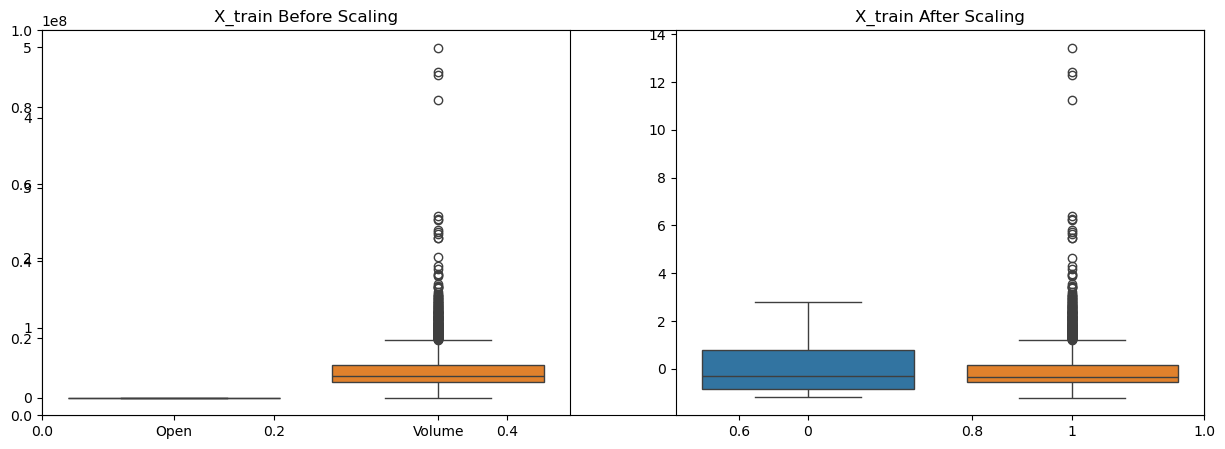

In [95]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression

Mean absolute error 0.6860516781903081
R2 Score 0.9993347136400312


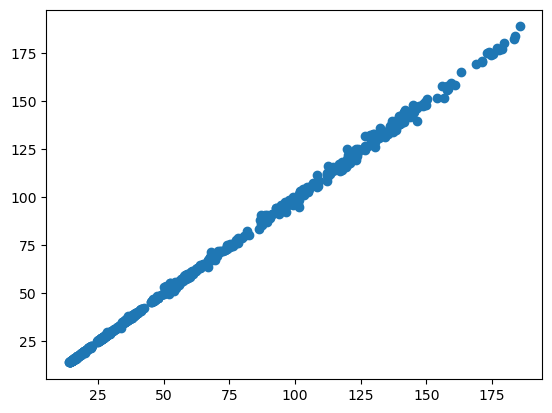

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean absolute error 1.170441204811928
R2 Score 0.9987780166724687


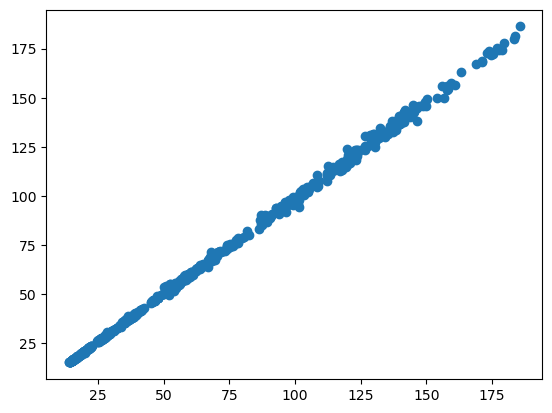

In [98]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Ridge Regression

Mean absolute error 0.6885848628238759
R2 Score 0.9993326471792575


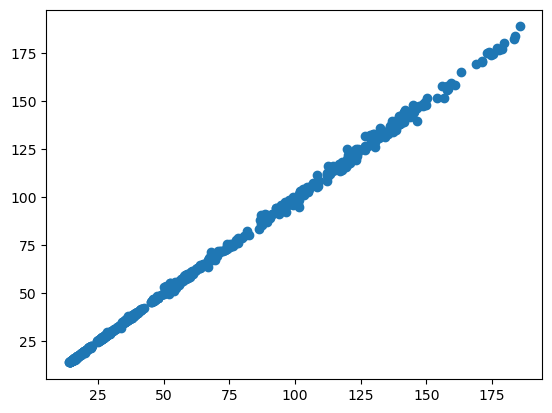

In [99]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## ElasticNet Regression

Mean absolute error 12.729454260838587
R2 Score 0.8880344686249724


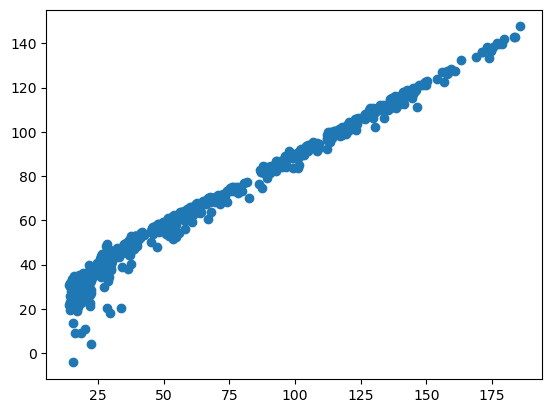

In [100]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## support vector machine

In [101]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [102]:
y_pred=svr.predict(X_test)

In [103]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.280111601794659
27.89403609852228


In [104]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [105]:
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.117 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.111 total time=   0.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.047 total time=   0.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.088 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.117 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.111 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.047 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.088 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.070 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [106]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [107]:
grid_prediction=grid.predict(X_test)

In [108]:
print(r2_score(y_test,grid_prediction))
print(mean_absolute_error(y_test,grid_prediction))


0.007947537060207233
37.801434441941296


In [111]:
scaler

StandardScaler()

In [117]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [121]:
import pickle

In [122]:
pickle.dump(regressor, open('linear_model.pkl','wb'))